In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Select a few important columns
data = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

data = data.dropna()

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [31]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [33]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(acc, 3))
print("Confusion Matrix:\n", cm)


Accuracy: 0.798
Confusion Matrix:
 [[86 13]
 [23 56]]


In [34]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))



Classification Report:
               precision    recall  f1-score   support

           0      0.789     0.869     0.827        99
           1      0.812     0.709     0.757        79

    accuracy                          0.798       178
   macro avg      0.800     0.789     0.792       178
weighted avg      0.799     0.798     0.796       178



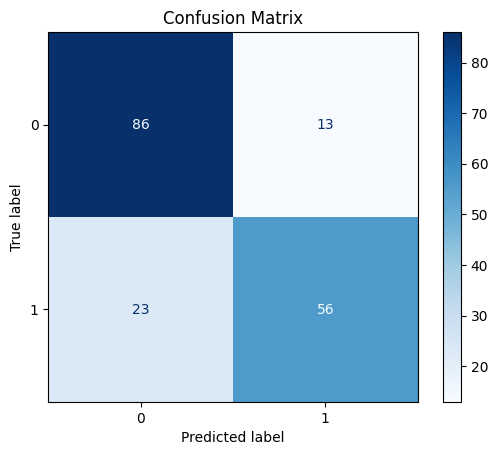

In [35]:
import matplotlib.pyplot as plt


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [36]:
print("Interpretation:")
print(f"- The model achieved an accuracy of {acc:.2f}.")
print("- It predicts survival based on factors like class, age, fare, and gender.")
print("- Higher survival is typically associated with higher fare and female passengers.")
print("- Logistic Regression worked well for this simple binary classification task.")


Interpretation:
- The model achieved an accuracy of 0.80.
- It predicts survival based on factors like class, age, fare, and gender.
- Higher survival is typically associated with higher fare and female passengers.
- Logistic Regression worked well for this simple binary classification task.
